In [1]:
import pandas as pd
import datetime

In [2]:
df = pd.read_csv("caltech.csv")

In [3]:
df.head()

,Unnamed: 0,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,totalChargingTime,totalConnectionTime
0,0,5bc90cb9f9af8b0d7fe77cd2,39,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,NaN,7986.0,7926.0
1,1,5bc90cb9f9af8b0d7fe77cd3,39,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,NaN,10745.0,40266.0
2,2,5bc90cb9f9af8b0d7fe77cd4,39,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,NaN,3954.0,33535.0
3,3,5bc90cb9f9af8b0d7fe77cd5,39,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,NaN,5296.0,33508.0
4,4,5bc90cb9f9af8b0d7fe77cd6,39,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,NaN,10796.0,30158.0


In [5]:
#Removing Unnnecessary Columns 
df.drop(columns = ["Unnamed: 0"], inplace = True)
dropCols = []

In [7]:
dropCols.append("siteID")
dropCols.append("clusterID")
dropCols.append("timezone")
dropCols.append("spaceID")
dropCols.append("stationID")
dropCols.append("userID")
dropCols.append("userInputs")
dropCols.append("_id")
dropCols.append("sessionID")
df.drop(columns = dropCols, inplace = True)

In [8]:
df.head(5)

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986.0,7926.0
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745.0,40266.0
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954.0,33535.0
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296.0,33508.0
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796.0,30158.0


In [9]:
def dropOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    return df.loc[filter]  

In [10]:
df = dropOutliers(df, "totalConnectionTime")

In [12]:
df.shape

(30989, 6)

In [13]:
df = dropOutliers(df, "totalChargingTime")

In [14]:
df.shape

(27171, 6)

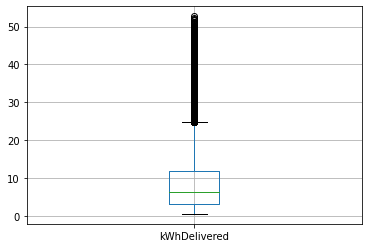

In [15]:
df.boxplot("kWhDelivered")

In [16]:
df = dropOutliers(df, "kWhDelivered")

In [17]:
df.shape

(26275, 6)

In [18]:
df.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986.0,7926.0
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745.0,40266.0
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954.0,33535.0
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296.0,33508.0
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796.0,30158.0


In [19]:
datetime.datetime.strptime(df.connectionTime[0], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2018, 4, 25, 11, 8, 4)

In [20]:
startTimes = list(df.connectionTime)
stopTimes = list(df.doneChargingTime)

In [21]:
for idx, val in enumerate(startTimes):
    startTimes[idx] = datetime.datetime.strptime(val, "%Y-%m-%d %H:%M:%S")

for idx, val in enumerate(stopTimes):
    stopTimes[idx] = datetime.datetime.strptime(val, "%Y-%m-%d %H:%M:%S")

In [23]:
df["StartTime"] = startTimes
df["StopTime"] = stopTimes

In [24]:
df.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,StartTime,StopTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986.0,7926.0,2018-04-25 11:08:04,2018-04-25 13:21:10
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745.0,40266.0,2018-04-25 13:45:10,2018-04-25 16:44:15
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954.0,33535.0,2018-04-25 13:45:50,2018-04-25 14:51:44
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296.0,33508.0,2018-04-25 14:37:06,2018-04-25 16:05:22
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796.0,30158.0,2018-04-25 14:40:34,2018-04-25 17:40:30


In [25]:
df.drop(columns = ["connectionTime", "disconnectTime", "doneChargingTime"], inplace = True)

In [26]:
min(startTimes), max(startTimes),min(stopTimes), max(stopTimes)

(datetime.datetime(2018, 4, 25, 11, 8, 4),
 datetime.datetime(2021, 9, 13, 23, 11, 12),
 datetime.datetime(2018, 4, 25, 13, 21, 10),
 datetime.datetime(2021, 9, 14, 0, 28, 6))

In [27]:
hourlyConsumption = {}
startBuckets = []
minTime = min(startTimes)
currentTime = datetime.datetime(minTime.year, minTime.month, minTime.day, minTime.hour) 
while currentTime < max(stopTimes):
    currentTime = currentTime + datetime.timedelta(hours = 1)
    startBuckets.append(currentTime)
    hourlyConsumption[currentTime] = 0

In [30]:
# hourlyConsumption = {}
totalSum = 0
for idx, row in df.iterrows():
#     if idx != 16:
#         continue
    totalTime = row.totalChargingTime
    remainingTime = row.totalChargingTime
    currentTime = row.StartTime
    
    currentSum = 0
    stopTime = currentTime + datetime.timedelta(seconds = totalTime)
    try:
        a = datetime.datetime(row.StartTime.year, row.StartTime.month, row.StartTime.day, row.StartTime.hour  +1)
    except:
        continue
    upperTime = datetime.datetime(row.StartTime.year, row.StartTime.month, row.StartTime.day, row.StartTime.hour  +1)
    
    while remainingTime > 0:
        minUpperTime = min(upperTime, stopTime)
        
        remainingTime -= (minUpperTime - currentTime).seconds
        
        if remainingTime < 0:
#             hourlyConsumption[stopTime] = hourlyConsumption.get(upperTime, 0) + (stopTime - (stopTime - datetime.timedelta(hours = 1))).seconds / totalTime * row.TotalEnergy
            continue
        
#         print(minUpperTime, currentTime, remainingTime)
#         print((((minUpperTime - currentTime).seconds / totalTime) * row.TotalEnergy))
#         print(((minUpperTime - currentTime).seconds / totalTime))
        hourlyConsumption[upperTime] = hourlyConsumption.get(upperTime, 0) + (((minUpperTime - currentTime).seconds / totalTime) * row.kWhDelivered)
        currentSum += (((minUpperTime - currentTime).seconds / totalTime) * row.kWhDelivered)
        currentTime = upperTime
        upperTime = upperTime + datetime.timedelta(hours = 1)
        
    totalSum += currentSum 
    print(idx, row.kWhDelivered, currentSum)

Streaming output truncated to the last 5000 lines.
24175 2.065 2.065
24176 0.948 0.948
24177 4.172 4.172
24178 1.501 1.501
24179 0.783 0.783
24180 3.771 3.771
24181 1.779 1.779
24184 6.534 6.534000000000001
24185 7.544 7.544
24186 0.883 0.8829999999999999
24187 8.467 8.467
24188 2.262 2.2620000000000005
24189 5.967 5.966999999999999
24190 14.59 14.590000000000002
24192 16.362 16.362
24193 5.016 5.016
24194 7.886 7.885999999999999
24195 5.522 5.522
24196 0.873 0.873
24197 15.012 15.012
24198 14.677 14.677
24199 8.628 8.628
24200 8.001 8.001
24201 0.935 0.935
24202 13.29 13.29
24203 16.999 16.999
24204 0.833 0.8330000000000001
24205 3.511 3.511
24207 8.169 8.169000000000002
24208 14.536 14.536
24209 0.88 0.8799999999999999
24210 5.688 5.687999999999999
24211 3.495 3.495
24212 0.546 0.546
24213 15.149 15.149000000000001
24214 0.816 0.8159999999999998
24215 6.218 6.218
24216 8.624 8.624
24217 23.888 23.888
24218 7.872 7.872
24219 4.402 4.402
24220 1.764 1.764
24221 5.569 5.568999999999999


In [31]:
df.iloc[16]

kWhDelivered                         4.043
totalChargingTime                   8161.0
totalConnectionTime                32910.0
StartTime              2018-04-25 15:33:45
StopTime               2018-04-25 17:49:46
Name: 16, dtype: object

In [36]:
temp = {"TimeStamp" : hourlyConsumption.keys(), "EnergyConsumed" : hourlyConsumption.values()}
energyConsumed = pd.DataFrame(temp)

In [37]:
energyConsumed.set_index("TimeStamp", inplace = True)

In [38]:
energyConsumed

,EnergyConsumed
TimeStamp,
2018-04-25 12:00:00,3.094930
2018-04-25 13:00:00,3.575657
2018-04-25 14:00:00,3.220890
2018-04-25 15:00:00,12.224048
2018-04-25 16:00:00,36.981414
...,...
2021-09-13 21:00:00,6.117279
2021-09-13 22:00:00,8.114971
2021-09-13 23:00:00,6.776709


In [39]:
energyConsumed.sort_values("TimeStamp", inplace = True)

In [40]:
energyConsumed.index.freq = "H"

In [41]:
energyConsumed.to_csv("energyConsumption.csv")

In [ ]:
energy = pd.read_csv("energyHourlyDistribution.csv")

In [43]:
energy.set_index("TimeStamp", inplace = True)

In [44]:
energy.head()

,EnergyConsumed
TimeStamp,
2018-04-25 12:00:00,3.094930
2018-04-25 13:00:00,3.575657
2018-04-25 14:00:00,3.220890
2018-04-25 15:00:00,12.224048
2018-04-25 16:00:00,36.981414


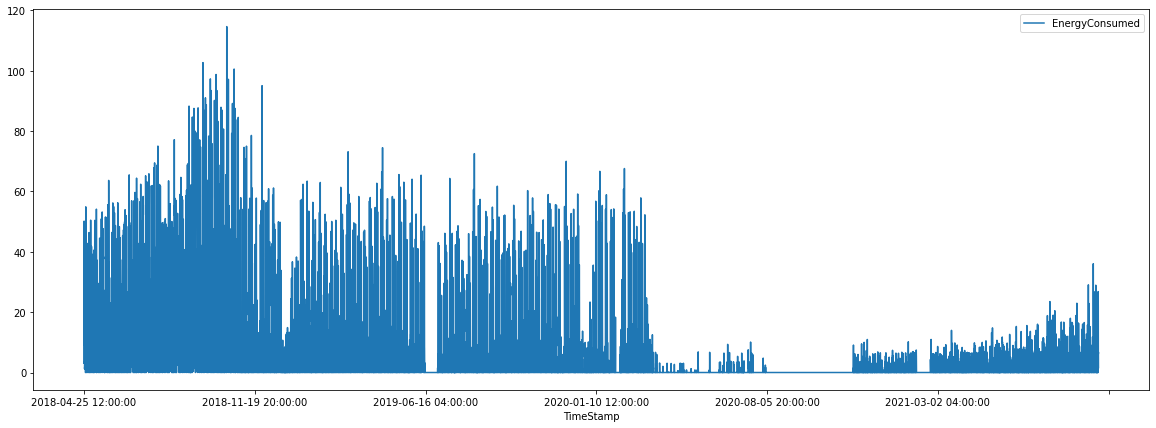

In [68]:
energy.plot(figsize=(20, 7));

In [57]:
print (energy.loc['2020-02-27 00:00:00']) 

EnergyConsumed    5.969272
Name: 2020-02-27 00:00:00, dtype: float64


In [62]:
Energy_Data = energy[:'2020-02-27 00:00:00']

In [69]:
Energy_Data


,EnergyConsumed
TimeStamp,
2018-04-25 12:00:00,3.094930
2018-04-25 13:00:00,3.575657
2018-04-25 14:00:00,3.220890
2018-04-25 15:00:00,12.224048
2018-04-25 16:00:00,36.981414
...,...
2020-02-26 20:00:00,28.527221
2020-02-26 21:00:00,12.749949
2020-02-26 22:00:00,15.502031


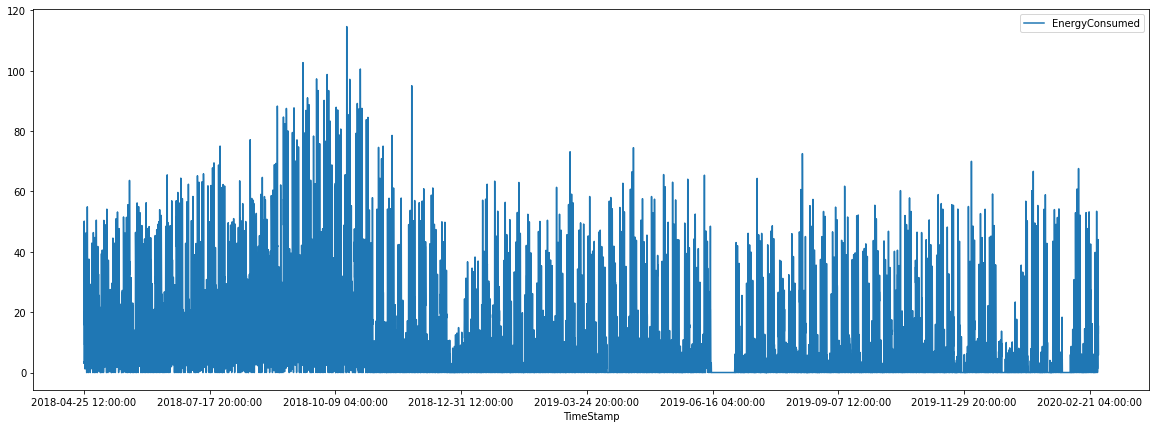

In [70]:
Energy_Data.plot(figsize=(20, 7))

In [71]:
Energy_Data.to_csv("energyConsumption.csv")